In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# load behavior

# plot all speeds histograms
filename = 'mn_20250619_093749DLC_clean.csv'
morn_beh = pd.read_csv(filename)
morn_beh['time'] = pd.to_datetime(morn_beh['time'])
morn_beh['time'] = morn_beh['time'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
morn_beh['time_bin'] = ((morn_beh['time'] - morn_beh['time'][0]) // 450)
morn_beh

,time,neck_x,neck_y,neck_speed,time_bin
0,34681,721.514605,298.022495,NaN,0
1,34681,721.489199,297.937233,0.088967,0
2,34681,721.439015,297.767789,0.176719,0
3,34681,721.365246,297.516451,0.261940,0
4,34681,721.269720,297.186441,0.343558,0
...,...,...,...,...,...
336593,45900,729.944000,283.458600,0.000000,24
336594,45900,729.944000,283.458600,0.000000,24
336595,45900,729.944000,283.458600,0.000000,24
336596,45900,729.944000,283.458600,0.000000,24


In [4]:
# load behavior

# plot all speeds histograms
filename = 'mn_20250619_141151DLC_clean.csv'
afternoon_beh = pd.read_csv(filename)
afternoon_beh['time'] = pd.to_datetime(afternoon_beh['time'])
afternoon_beh['time'] = afternoon_beh['time'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
afternoon_beh['time_bin'] = ((afternoon_beh['time'] - afternoon_beh['time'][0]) // 450)
afternoon_beh

,time,neck_x,neck_y,neck_speed,time_bin
0,7923,586.853010,388.428209,NaN,0
1,7923,586.848256,388.460095,0.032238,0
2,7923,586.838689,388.523562,0.064184,0
3,7923,586.824202,388.618020,0.095563,0
4,7923,586.804672,388.742542,0.126044,0
...,...,...,...,...,...
387111,20826,499.217775,284.216766,0.000664,28
387112,20826,499.217375,284.216407,0.000537,28
387113,20826,499.217078,284.216128,0.000407,28
387114,20826,499.216881,284.215938,0.000274,28


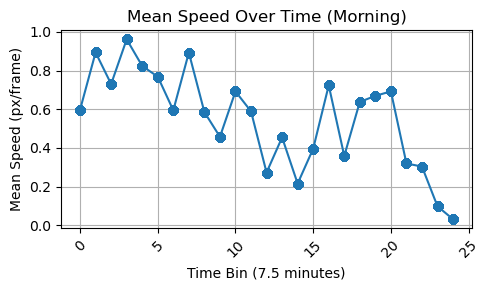

In [5]:
# calculate the mean speed for each bin
morn_beh['mean_speed'] = morn_beh.groupby('time_bin')['neck_speed'].transform('mean')
# plot the mean speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(morn_beh['time_bin'], morn_beh['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Mean Speed (px/frame)')
plt.title('Mean Speed Over Time (Morning)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

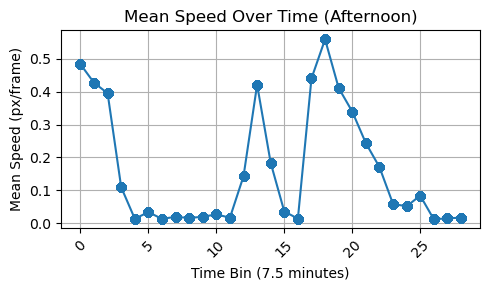

In [6]:
# calculate the mean speed for each bin
afternoon_beh['mean_speed'] = afternoon_beh.groupby('time_bin')['neck_speed'].transform('mean')
# plot the mean speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(afternoon_beh['time_bin'], afternoon_beh['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Mean Speed (px/frame)')
plt.title('Mean Speed Over Time (Afternoon)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
# get the unique time bins for the mean speed
unique_bins = morn_beh['time_bin'].unique()
mean_speeds = morn_beh.groupby('time_bin')['mean_speed'].mean().values
# same for afternoon
afternoon_mean_speeds = afternoon_beh.groupby('time_bin')['mean_speed'].mean().values

In [8]:
# load hormone data
horm = pd.read_csv('data_array_morning.csv')
horm_aft = pd.read_csv('data_array_afternoon.csv')
# hormones started also at 9:38, but it takes a few minutes for the dialyzate to reach the outlet
# informed guess is that we are one sample away. So excluding the first sample makes sense (we did that - that is 02.)
# then we also excluded the sample 03, i.e. the one that started at 9:45:30.
# so we actually have behavior "padding", in the sense that we have 7.5 minutes of behavior before the first hormone sample.
# and I think we also excluded the last one

In [9]:
comps = horm.columns

In [10]:
np.sort(comps)

array(['(R)-1-Aminopropan-2-ol', '1-Methylhistidine',
       '1_2-Dihydroxynaphthalene-6-sulfonic_acid',
       '2-Aminomuconate_semialdehyde', '2-Aminooctanoic_acid',
       '2-Hydroxy-cis-hex-2_4-dienoic_acid',
       '2-Hydroxyethylenedicarboxylic_acid', '2-Naphthol',
       '2_4-Dichlorophenol', '2_6-Dihydroxypyridine',
       '2_8-Dihydroxyadenine', '3-(4-Hydroxyphenyl)lactic_acid',
       '3-Aminoisobutyric_acid', '3-Cyano-L-alanine',
       '3-Hydroxy-L-proline', '3-Hydroxybenzaldehyde',
       '3-Methylsalicylaldehyde', '3-Nitrotyrosine',
       '4-(1_1_3_3-Tetramethylbutyl)-phenol',
       '4-Amino-2-hydroxylamino-6-nitrotoluene', '4-Aminobutyraldehyde',
       '4-Chloro-L-lysine', '4-Cresol/3-Cresol', '4-Ethylphenol',
       '4-Formylsalicylic_acid', '4-Guanidinobutanal',
       '4-Hydroxy-3-methylbenzaldehyde',
       '4-Hydroxybenzaldehyde/3-Hydroxybenzaldehyde',
       '4-Hydroxybenzoic_acid', '4-Hydroxyphenylacetic_acid',
       '4-Methyl-5-nitrocatechol', '4-Nitrophenol'

In [11]:
def zs(x):
    return (x - np.mean(x)) / np.std(x)

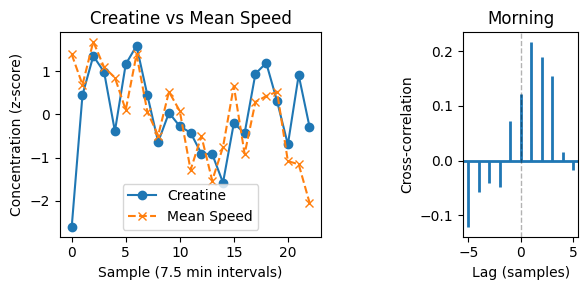

In [85]:
# plot some hormones
co = 'Creatine'#'Uracil' # 'Creatine' # 'Histamine'
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(horm[co], marker='o', linestyle='-', label=co)
# plot speed too
plt.plot(zs(mean_speeds[1:-1]), marker='x', linestyle='--', label='Mean Speed')
plt.xlabel('Sample (7.5 min intervals)')
plt.ylabel('Concentration (z-score)')
plt.title(co+' vs Mean Speed')
plt.legend()
plt.subplot(1, 4, 3)
# plot xcorr between histamine and mean speed
lags, xcr, _, _ = plt.xcorr(horm[co], mean_speeds[1:-1], maxlags=5, usevlines=True, normed=True, lw=2)
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-correlation')
plt.tight_layout()
plt.title('Morning')
plt.axvline(0, color='k', linestyle='--', lw=1,alpha=0.3)
plt.show()

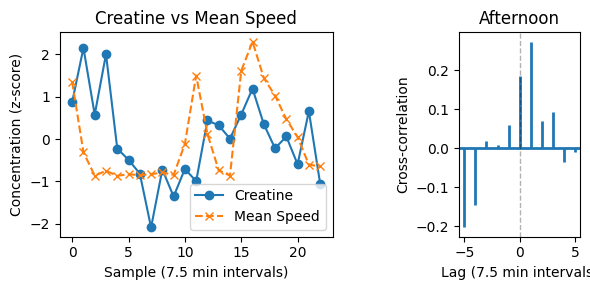

In [86]:
# plot some hormones
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(horm_aft[co], marker='o', linestyle='-', label=co)
# plot speed too
plt.plot(zs(afternoon_mean_speeds[2:-4]), marker='x', linestyle='--', label='Mean Speed')
plt.xlabel('Sample (7.5 min intervals)')
plt.ylabel('Concentration (z-score)')
plt.title(co+' vs Mean Speed')
plt.legend()
plt.subplot(1, 4, 3)
# plot xcorr between histamine and mean speed
lags, xcr, _, _ = plt.xcorr(horm_aft[co], afternoon_mean_speeds[2:-4], maxlags=5, usevlines=True, normed=True, lw=2)
plt.xlabel('Lag (7.5 min intervals)')
plt.ylabel('Cross-correlation')
plt.tight_layout()
plt.title('Afternoon')
plt.axvline(0, color='k', linestyle='--', lw=1,alpha=0.3)
plt.show()

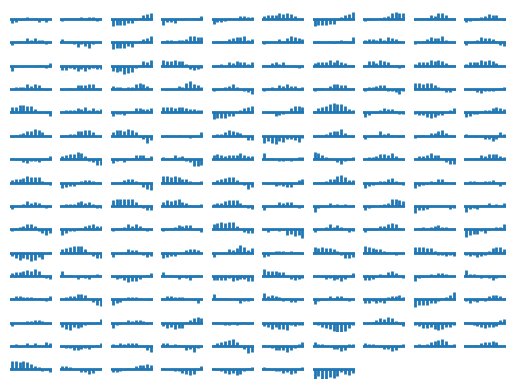

In [87]:
# compute cross correlogram between behavior and hormones
xcorrs = []
for i in range(len(comps)):
    plt.subplot(16,10,i+1)
    lags, xcr, _,_ = plt.xcorr(horm[comps[i]], mean_speeds[1:-1], maxlags=5, usevlines=True, normed=True, lw=2)
    xcorrs.append(xcr)
    plt.axis('off')
    plt.ylim(-0.4, 0.4)

In [89]:
maxx = np.max(np.array(xcorrs), axis=1)
amax = np.arange(-5,6)[np.argmax(np.array(xcorrs), axis=1)]

In [17]:
np.where((amax == -1)*(maxx>0.25))

(array([  5,  28,  29,  52,  61,  68,  70,  82,  83,  84, 101]),)

In [18]:
comps[82]

'Uracil'

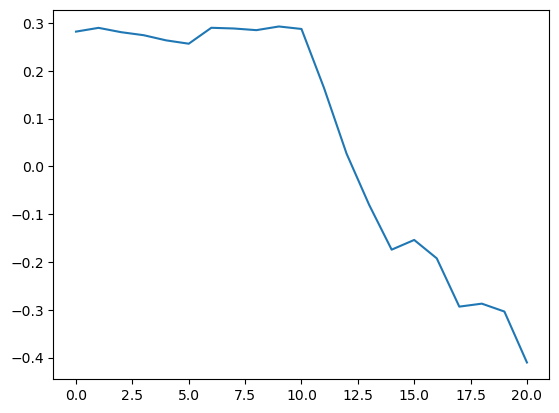

In [19]:
plt.plot(xcorrs[82])

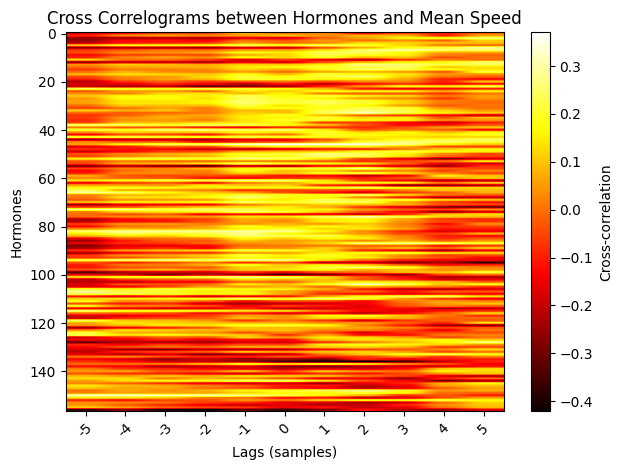

In [90]:
plt.imshow(np.array(xcorrs), aspect='auto', cmap='hot')
plt.xticks(np.arange(len(lags)), lags, rotation=45)
plt.xlabel('Lags (samples)')
plt.ylabel('Hormones')
plt.colorbar(label='Cross-correlation')
plt.title('Cross Correlograms between Hormones and Mean Speed')
plt.tight_layout()
plt.show()

In [94]:
np.array(xcorrs).shape

(157, 11)

In [97]:
bad

array([  0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   3,   4,
         4,   4,   5,   6,   6,   6,   7,   7,   7,   8,   8,   8,   9,
         9,   9,  10,  10,  10,  11,  11,  11,  12,  12,  12,  13,  13,
        13,  14,  14,  14,  15,  15,  15,  16,  16,  16,  17,  17,  17,
        18,  18,  18,  19,  19,  19,  20,  20,  20,  21,  21,  21,  22,
        22,  22,  23,  23,  23,  24,  24,  24,  25,  25,  25,  26,  26,
        26,  27,  27,  27,  28,  28,  29,  29,  30,  30,  30,  31,  31,
        31,  32,  32,  32,  33,  33,  33,  34,  34,  34,  35,  35,  35,
        36,  36,  36,  37,  37,  37,  38,  38,  38,  39,  39,  39,  40,
        41,  41,  41,  42,  42,  42,  43,  43,  43,  44,  44,  44,  45,
        45,  45,  47,  47,  47,  48,  48,  48,  49,  49,  49,  50,  50,
        51,  51,  52,  52,  53,  53,  53,  54,  54,  54,  55,  55,  55,
        56,  56,  56,  57,  57,  57,  58,  58,  58,  59,  59,  59,  60,
        60,  60,  61,  62,  62,  62,  63,  63,  63,  64,  64,  6

array([ 0.08308732,  0.09984096, -0.02222765,  0.04591305,  0.05023418,
        0.25374092, -0.03902698,  0.14166441,  0.2404648 ,  0.21765966,
        0.20316008, -0.06417767, -0.03701933,  0.14763661,  0.20696053,
        0.17235891,  0.06212912,  0.21664615,  0.21120528,  0.20829323,
        0.00804434, -0.11577001, -0.08990944,  0.21253417,  0.18516999,
        0.16680822,  0.24673971,  0.22984883,  0.25395609,  0.25087956,
        0.22564913,  0.18817332,  0.22247337,  0.24360166,  0.20844435,
        0.20772651,  0.2111699 ,  0.15800939,  0.24869106, -0.0697986 ,
        0.2776598 ,  0.21078112,  0.19522551,  0.2378618 , -0.03438341,
        0.03361706,  0.37051534,  0.16978067, -0.10621656,  0.09975211,
        0.280382  ,  0.25691301,  0.26446819,  0.02685661,  0.24398523,
       -0.11812095,  0.21122348,  0.18296705,  0.18435213, -0.05773503,
       -0.06264925,  0.28490744,  0.15930352,  0.12298233,  0.18757   ,
       -0.04038505,  0.05536968,  0.20982614,  0.26459302,  0.23

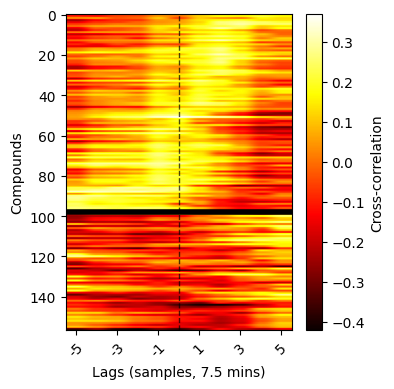

In [112]:
# order by amax
# SPLIT INDICES FOR THINGS THAT HAVE HIGHER CROSS-CORRELATION
good = np.where(np.max(np.array(xcorrs)[:,4:7],1)>0.1)[0]
bad = np.where(np.max(np.array(xcorrs)[:,4:7],1)<0.1)[0]
sorted_indices = np.concatenate([good[np.argsort(amax[good])[::-1]],bad])

plt.figure(figsize=(4,4))
plt.imshow(np.array(xcorrs)[sorted_indices], aspect='auto', cmap='hot')
plt.xticks(np.arange(0,len(lags),2), lags[::2], rotation=45)
plt.xlabel('Lags (samples, 7.5 mins)')
plt.ylabel('Compounds')
plt.colorbar(label='Cross-correlation')
# vline at zero
plt.axvline(5, color='k', linestyle='--', lw=1, alpha=0.7)
plt.axhline(len(good), color='black', linestyle='-', lw=4, alpha=1)
# plt.title('Ordered Cross Correlograms between Hormones and Mean Speed')
plt.tight_layout()
plt.show()

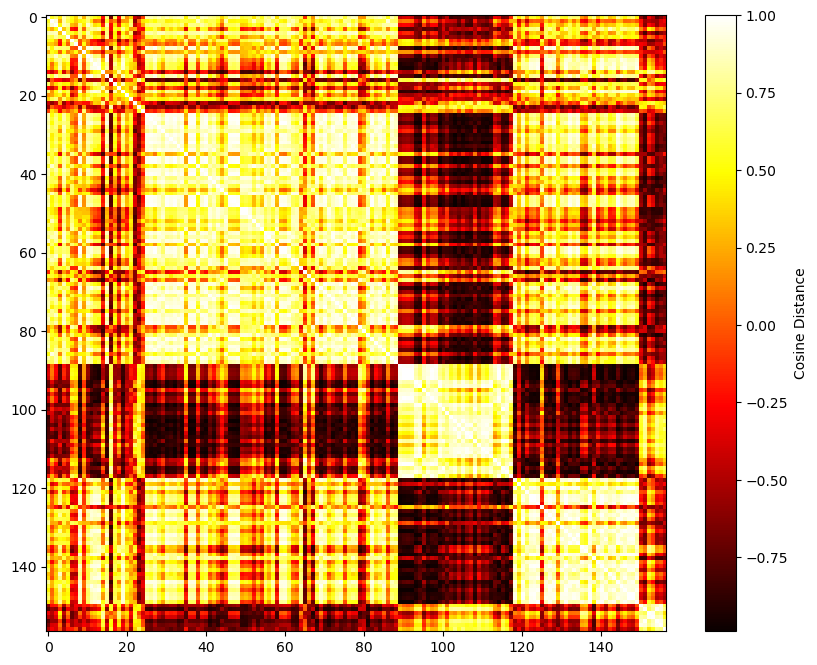

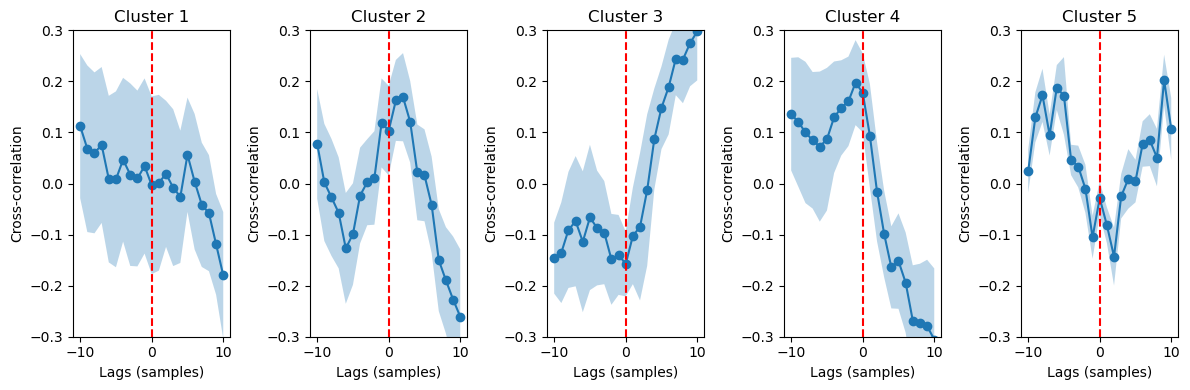

In [34]:
# cluster the cross-correlations with spectral clustering and using a cosine distance metric
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_distances

# Convert the list of cross-correlations to a 2D array
xcorrs_array = np.array(xcorrs)
# Compute the cosine distance matrix
# cosine_dist_matrix = 2-cosine_distances(xcorrs_array)
cosine_dist_matrix = 1+np.corrcoef(xcorrs_array)
# Perform spectral clustering
n_clusters = 5  # Adjust the number of clusters as needed
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = spectral_clustering.fit_predict(cosine_dist_matrix)
# plot the cosine distance matrix reordered
plt.figure(figsize=(10, 8))
# plt.imshow(cosine_dist_matrix[np.argsort(labels)][:, np.argsort(labels)], cmap='hot', aspect='auto')
plt.imshow(np.corrcoef(xcorrs)[np.argsort(labels)][:, np.argsort(labels)], cmap='hot', aspect='auto')
plt.colorbar(label='Cosine Distance')
plt.show()
# Plot the clustered cross-correlations
plt.figure(figsize=(12, 4))
for i in range(n_clusters):
    plt.subplot(1,n_clusters, i + 1)
    cluster_indices = np.where(labels == i)[0]
    # plt.barplot(lags, np.mean(xcorrs_array[cluster_indices],0))
    # plot as a barplot
    plt.plot(lags, np.mean(xcorrs_array[cluster_indices], 0), marker='o', linestyle='-', label=f'Cluster {i + 1}')
    # add shaded area for std
    plt.fill_between(lags, np.mean(xcorrs_array[cluster_indices],0) - np.std(xcorrs_array[cluster_indices],0),
                     np.mean(xcorrs_array[cluster_indices],0) + np.std(xcorrs_array[cluster_indices],0), alpha=0.3)
    plt.title(f'Cluster {i + 1}')
    plt.xlabel('Lags (samples)')
    plt.ylabel('Cross-correlation')
    plt.axvline(x=0, color='red', linestyle='--', label='Zero Lag')
    plt.ylim(-0.3, 0.3)
plt.tight_layout()
plt.show()

In [124]:
horm = pd.read_csv('data_array_afternoon.csv')

In [1]:
cors = []
for i in range(22):
    plt.scatter(horm.loc[0],horm.loc[i], alpha=0.5)
    plt.title(f'Lag {i}')
    plt.show()
    cors.append(np.corrcoef(horm.loc[0],horm.loc[i])[0,1])

NameError: name 'plt' is not defined

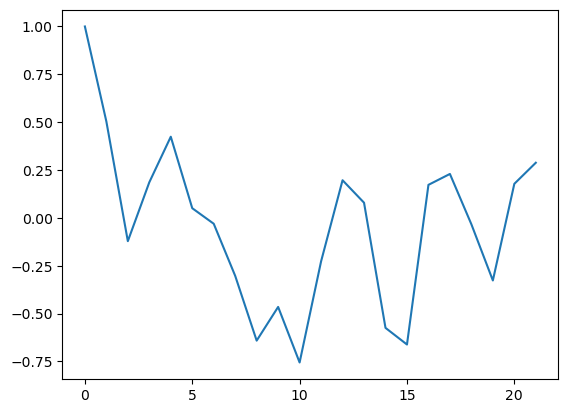

In [126]:
plt.plot(cors)